# Implementation of Shapiro's chapter 8 section 8.9

### Combined friction and heat transfer

Constant Pipe Temperature

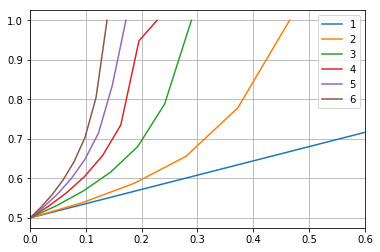

In [3]:
import pint
import numpy as np
import matplotlib.pyplot as plt
u = pint.UnitRegistry()
#from scipy.integrate import solve_ivp
cp = 1000 * u.joule / u.kilogram / u.kelvin
k = 1.4
f = 0.005 #friction factor
D = 0.025 * u.meter
M0 = 0.5
#T0 = 350 * u.kelvin
ReynoldAnalogy = True
T02_T01 = 1.05
x0 = 0 * u.meter
Tw0_T01 = 4
n=40

def F_T0(M):
    FT0 = M**2*(1+k*M**2)*(1+(k-1)/2*M**2)/(1-M**2)
    return FT0

def F_f(M):
    Ff = k*M**4*(1+(k-1)/2*M**2)/(1-M**2)
    return Ff


def dM2(M):
    _x_1 = x0
    _M_1 = M
    if ReynoldAnalogy:
        _x2 = D / (2 * f) * np.log((Tw0_T01-1)/(Tw0_T01-T02_T01)) + _x_1
        _M_2 = _M_1 - 0.01
        converged = False
        while not converged:
            Mbar = (_M_1+_M_2) / 2
            Fbar_T0 = F_T0(Mbar)
            Fbar_f = F_f(Mbar)
            M2 = np.sqrt(_M_1 ** 2 + 2*(T02_T01-1.0)*(Fbar_T0/(T02_T01+1)+2*Fbar_f/(2*Tw0_T01-T02_T01-1)))
            if M2>1.0:
                M2=1
                break
            #print(M2,_x2, _M_1 ** 2 + 2*(T02_T01-1.0)*(Fbar_T0/(T02_T01+1)+2*Fbar_f/(2*Tw0_T01-T02_T01-1)),Fbar_T0,Fbar_f)
            #print(M2)
            if (np.abs(_M_2-M2)>0.0001):
                _M_2 = M2 - 0.00001
            else:
                converged = True
    return M2,_x2

fxD = np.zeros((n+1,8))
MM = np.zeros((n+1,8))


for j in range(1,7):
    #print("----------------------------------------------")
    x0 = 0 * u.meter
    Tw0_T01 = j+0.1
    M = M0
    fxD[0] = 4*f*x0/D
    MM[0] = M0
    for i in range(n):
        M, x2 = dM2(M)
        x0 = x2
        MM[i+1,j] = M
        fxD[i+1,j] = 4*f*x0/D
        if MM[i,j]==MM[i+1,j]:
            break
    plt.plot(fxD[0:i+1,j],MM[0:i+1,j],label=j)
    
plt.xlim(0,0.6)
plt.legend()
plt.grid()
plt.show()
    

In [99]:
MM[:,1]

array([0.5, 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. ])

In [100]:
MM[:,2]

array([0.5       , 0.53830475, 0.58718353, 0.65555277, 0.77811245,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [101]:
MM[:,3]

array([0.5       , 0.53139866, 0.56899393, 0.61612104, 0.68022537,
       0.7875988 , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [102]:
MM[:,4]

array([0.5       , 0.52907117, 0.56317546, 0.60461698, 0.65794745,
       0.73510131, 0.9481634 , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [103]:
MM[:,5]

array([0.5       , 0.52790151, 0.56030415, 0.5990904 , 0.64782201,
       0.71481478, 0.83452127, 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [104]:
MM[:,6]

array([0.5       , 0.52719778, 0.55859299, 0.59585225, 0.64203104,
       0.70384198, 0.80441527, 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])